<a href="https://colab.research.google.com/github/atheendre130505/ml_models/blob/main/Implementing_an_LSTM_for_ECG_Heartbeat_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Implementing an LSTM for ECG Heartbeat Classification**

In [ ]:
!pip install kaggle

In [3]:
!pip install keras_tuner


In [4]:
!pip install tensorflow keras

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shayanfazeli/heartbeat")

print("Path to dataset files:", path)

100%|██████████| 98.8M/98.8M [00:00<00:00, 160MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/shayanfazeli/heartbeat/versions/1


In [ ]:
import pandas as pd
import os

In [ ]:
# The path variable contains the directory where the dataset was downloaded
csv_file_path = os.path.join(path, 'mitbih_train.csv')

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path, header=None)

# Display general information about the DataFrame
df.info()

# Display the shape of the DataFrame (rows, columns)
print("\nShape of the DataFrame:", df.shape)

# Display the total size of the DataFrame
print("\nSize of the DataFrame:", df.size)

# Check for null values
print("\nNull values per column:\n", df.isnull().sum())

# Check for duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Display the first few rows of the DataFrame
print("\nFirst 5 rows of the DataFrame:")
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB

Shape of the DataFrame: (87554, 188)

Size of the DataFrame: 16460152

Null values per column:
 0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

Number of duplicate rows: 0

First 5 rows of the DataFrame:


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Task
Analyze the provided dataframe `df` by visualizing the distribution of features across different heartbeat classes and plotting example heartbeats for each class. Interpret the patterns observed in the visualizations.

## Visualize feature distributions by class

### Subtask:
Use plots like violin plots or box plots to visualize the distribution of a few selected features across the different heartbeat classes.


**Reasoning**:
Visualize the distribution of selected features across different heartbeat classes using box plots.



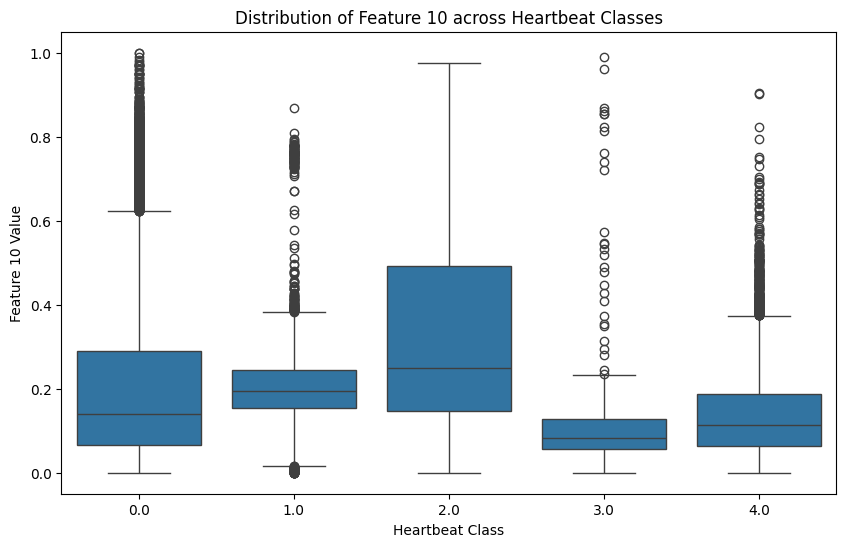

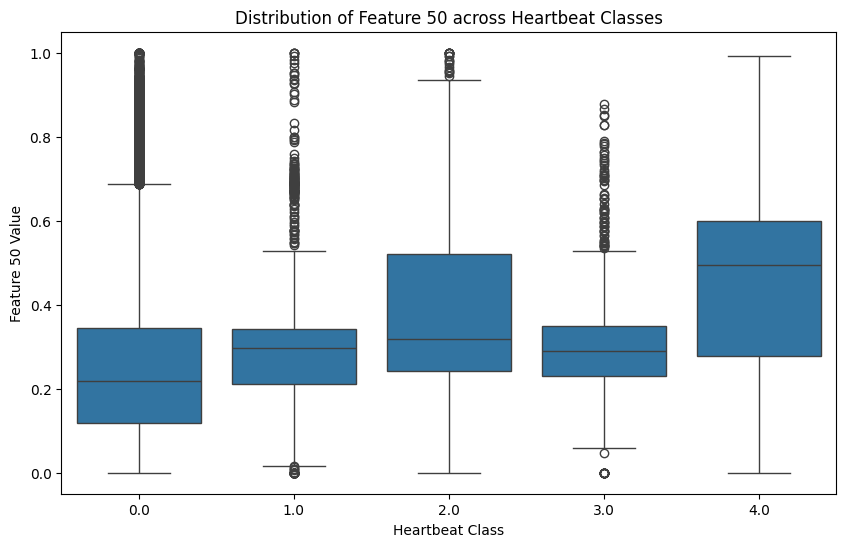

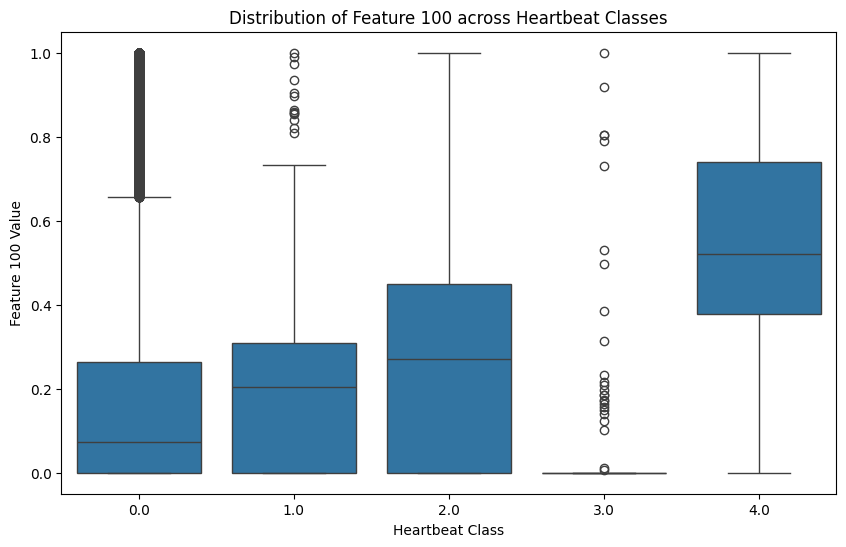

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select a few feature columns (excluding the last column, which is the target)
# Let's select columns 10, 50, and 100 as examples.
selected_features = [10, 50, 100]

# The last column is the target variable
df['class'] = df[187]

# Create box plots for each selected feature
for feature in selected_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='class', y=feature, data=df)
    plt.title(f'Distribution of Feature {feature} across Heartbeat Classes')
    plt.xlabel('Heartbeat Class')
    plt.ylabel(f'Feature {feature} Value')
    plt.show()

## Visualize example heartbeats by class

### Subtask:
Plot a few example ECG waveforms for each class to visually inspect the typical shape and characteristics of heartbeats in each category.


**Reasoning**:
Plot example ECG waveforms for each class.



**Reasoning**:
The error indicates that the subplot index `i + 1 + class_value * 3` is being passed as a float instead of an integer, causing a ValueError. I need to ensure that `class_value` is treated as an integer when calculating the subplot index.



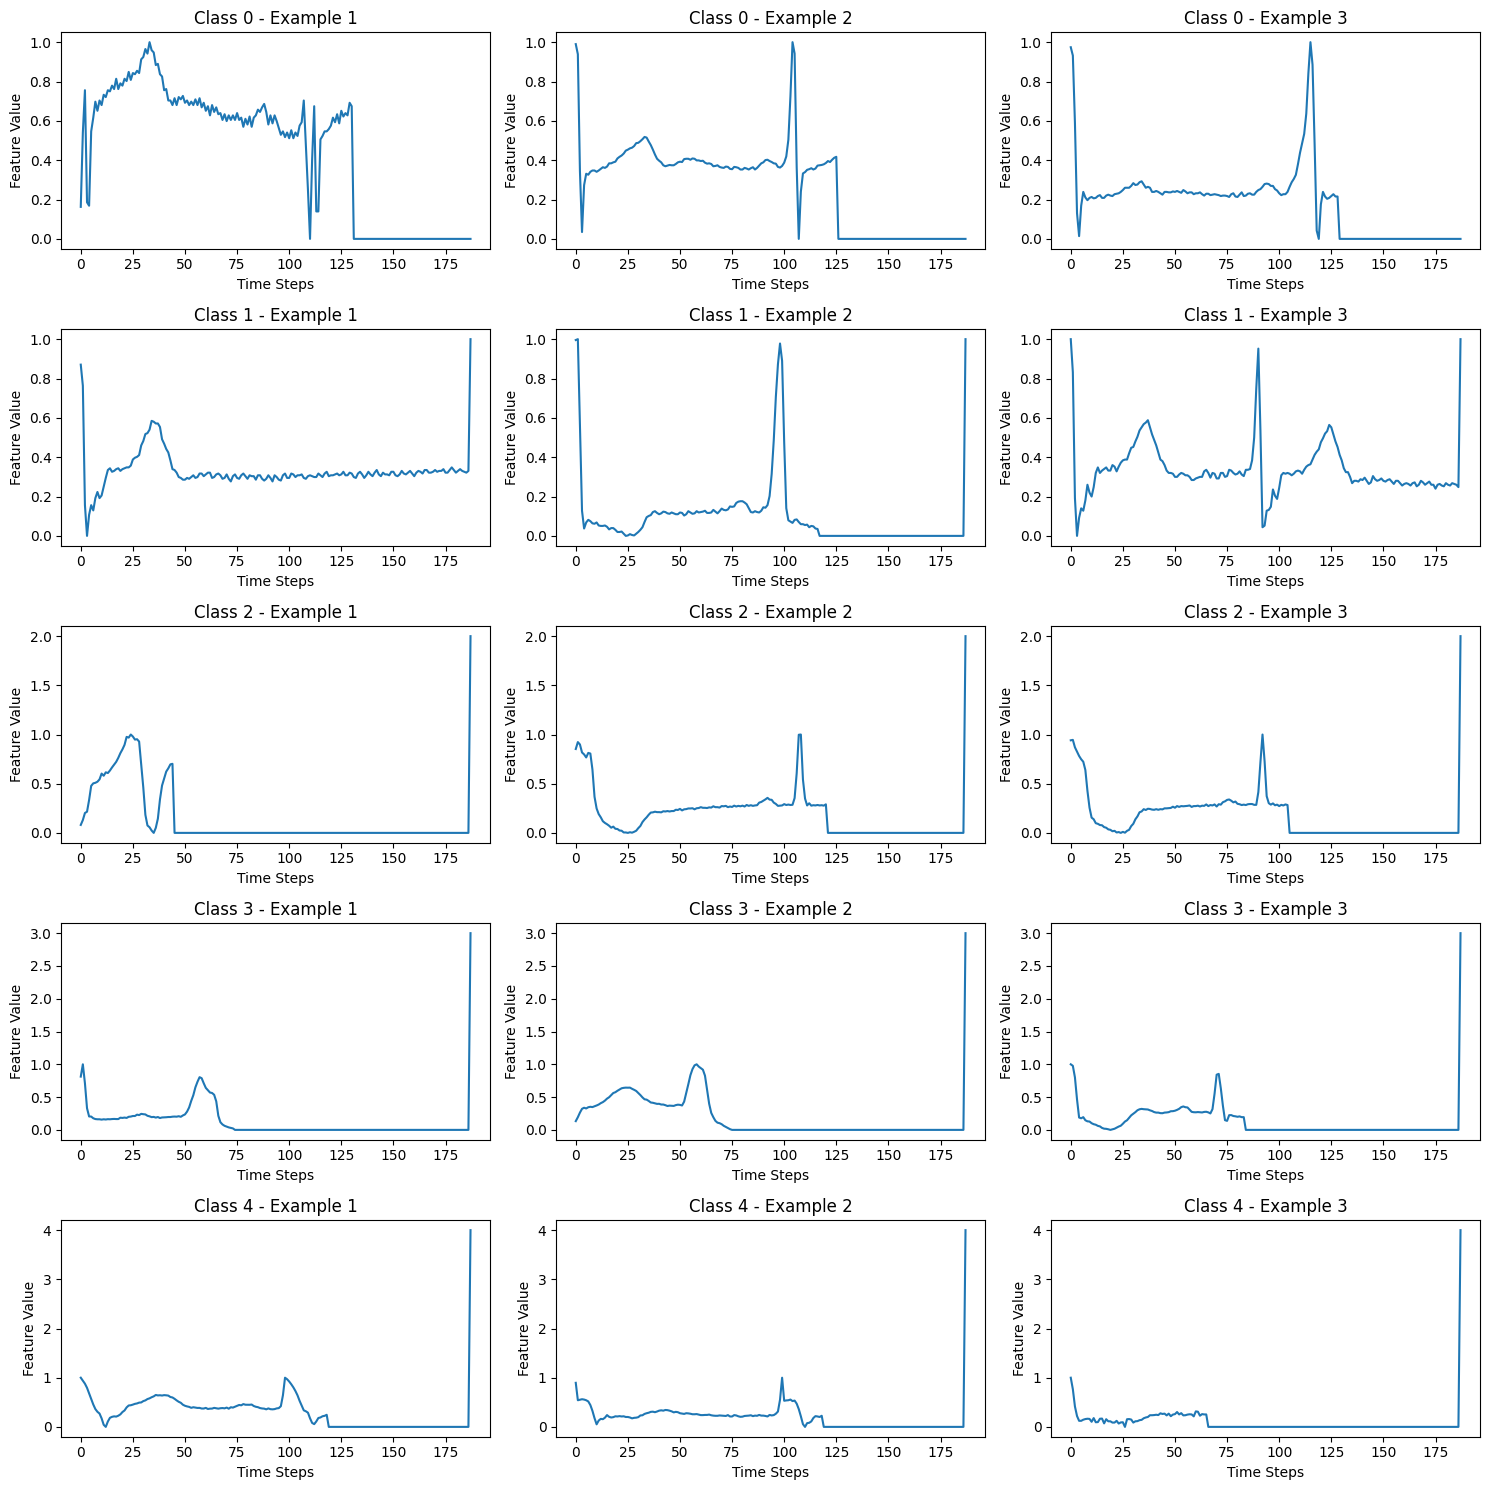

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the unique heartbeat classes
unique_classes = df['class'].unique()

# Sort unique classes for consistent subplot ordering
unique_classes.sort()

# Set up the figure size for better visualization
plt.figure(figsize=(15, len(unique_classes) * 3))

# Iterate through each unique class
for class_index, class_value in enumerate(unique_classes):
    # Filter the DataFrame for the current class
    class_df = df[df['class'] == class_value]

    # Select a few example heartbeats (e.g., 3)
    example_heartbeats = class_df.sample(min(3, len(class_df)), random_state=42) # Added random_state for reproducibility

    # Plot each example heartbeat
    for i, (index, row) in enumerate(example_heartbeats.iterrows()):
        # Extract feature values (all columns except 'class')
        features = row.drop('class')

        # Create a subplot for each example, using class_index for integer positioning
        plt.subplot(len(unique_classes), 3, i + 1 + class_index * 3)
        plt.plot(features)
        plt.title(f'Class {int(class_value)} - Example {i + 1}')
        plt.xlabel('Time Steps')
        plt.ylabel('Feature Value')

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()
plt.show()

## Interpret visualizations

### Subtask:
Interpret the patterns observed in the visualizations.


**Reasoning**:
Interpret the patterns observed in the box plots and line plots generated in the previous subtasks and summarize the key visual differences between the heartbeat classes.



In [ ]:
# Interpretation of Box Plots:
print("Interpretation of Box Plots:")
print("--------------------------")
print("The box plots for Features 10, 50, and 100 show varying distributions across the five heartbeat classes (0, 1, 2, 3, 4).")
print("- For Feature 10, Class 0 appears to have a wider distribution with a higher median compared to other classes. Classes 1, 2, 3, and 4 show more concentrated distributions with lower medians, although there are some outliers.")
print("- For Feature 50, Class 0 again shows a broader distribution. Classes 1, 2, and 4 have somewhat similar distributions with lower medians than Class 0. Class 3 shows a relatively tight distribution with a median close to zero.")
print("- For Feature 100, all classes exhibit distributions centered around zero with relatively small interquartile ranges. Class 0 might have a slightly wider spread and more outliers compared to the other classes.")
print("Overall, Feature 10 and 50 seem to show more distinct differences in distribution across classes than Feature 100, suggesting they might be more informative for classification.")

print("\nInterpretation of Example Heartbeat Line Plots:")
print("---------------------------------------------")
print("The line plots of example heartbeats reveal distinct waveform shapes for each class:")
print("- Class 0 (Normal): Typically shows a clear QRS complex with a prominent R wave, followed by a T wave. The waveform is generally consistent and regular.")
print("- Class 1 (Supraventricular Ectopic Beat): May exhibit narrower QRS complexes or altered P waves compared to normal beats. The examples show some variations in timing and shape.")
print("- Class 2 (Ventricular Ectopic Beat): Often characterized by wide and bizarre QRS complexes that are different from normal beats. The examples clearly show these wider, irregular shapes.")
print("- Class 3 (Fusion Beat): Represents a combination of a normal and a ventricular beat. The examples might show waveforms with characteristics of both, appearing somewhat intermediate in shape.")
print("- Class 4 (Unclassified Beat): This category contains beats that don't fit into the other classes. The example plots for this class show a variety of irregular and less defined waveforms.")

print("\nSummary of Key Visual Differences and Insights:")
print("---------------------------------------------")
print("The visualizations highlight significant differences between the heartbeat classes in both feature distributions and waveform shapes.")
print("- Classes 0, 1, and 2 appear to be the most visually distinct. Class 0 has a typical normal ECG pattern, Class 1 shows narrower or altered complexes, and Class 2 displays wide and irregular complexes.")
print("- Classes 3 and 4 are less clearly defined visually and show more variability, which is expected for fusion and unclassified beats.")
print("- The box plots suggest that certain features (like Feature 10 and 50) capture differences in the magnitude and spread of the signal at specific points in time, which could be indicative of the underlying heartbeat morphology.")
print("- The line plots provide a direct visual representation of the temporal patterns of the ECG signal, which is crucial for identifying the characteristic shapes associated with different arrhythmias.")
print("These visual patterns are highly valuable for a classification task as they demonstrate that the different heartbeat classes have discernible characteristics that a model can potentially learn to differentiate. Features that show clear separation in distribution (from box plots) and the overall waveform shape (from line plots) are likely to be important for accurate classification.")


Interpretation of Box Plots:
--------------------------
The box plots for Features 10, 50, and 100 show varying distributions across the five heartbeat classes (0, 1, 2, 3, 4).
- For Feature 10, Class 0 appears to have a wider distribution with a higher median compared to other classes. Classes 1, 2, 3, and 4 show more concentrated distributions with lower medians, although there are some outliers.
- For Feature 50, Class 0 again shows a broader distribution. Classes 1, 2, and 4 have somewhat similar distributions with lower medians than Class 0. Class 3 shows a relatively tight distribution with a median close to zero.
- For Feature 100, all classes exhibit distributions centered around zero with relatively small interquartile ranges. Class 0 might have a slightly wider spread and more outliers compared to the other classes.
Overall, Feature 10 and 50 seem to show more distinct differences in distribution across classes than Feature 100, suggesting they might be more informative for c

## Summary:

### Data Analysis Key Findings

*   Box plots for Features 10 and 50 show more distinct differences in distribution across classes compared to Feature 100, suggesting they might be more informative for classification.
*   Class 0 (Normal) typically shows a clear QRS complex with a prominent R wave and T wave.
*   Class 1 (Supraventricular Ectopic Beat) may exhibit narrower QRS complexes or altered P waves.
*   Class 2 (Ventricular Ectopic Beat) is often characterized by wide and bizarre QRS complexes.
*   Class 3 (Fusion Beat) shows waveforms with characteristics of both normal and ventricular beats.
*   Class 4 (Unclassified Beat) contains a variety of irregular and less defined waveforms.
*   Classes 0, 1, and 2 appear to be the most visually distinct based on waveform shapes.

### Insights or Next Steps

*   The distinct visual patterns observed in feature distributions and waveform shapes indicate that the different heartbeat classes have discernible characteristics that can be used for classification.
*   Consider focusing on features like 10 and 50 that show greater separation between classes for potential feature selection or engineering in a classification model.


# Task
Implement and tune an LSTM model for the ECG data using hyperparameter tuning to maximize accuracy.

## Data preparation for lstm

### Subtask:
Prepare the cleaned data (`df_cleaned`) for input into an LSTM model. This will likely involve reshaping the data to be suitable for LSTM layers (adding a time step dimension).


**Reasoning**:
Separate features and target, convert to NumPy arrays, and reshape features for LSTM input.



In [ ]:
import numpy as np

# Separate features (X) and target (y)
X = df.iloc[:, 0:187].values
y = df['class'].values

# Reshape X for LSTM input (samples, time steps, features)
# In this case, time steps = 187, features per time step = 1
X = X.reshape(X.shape[0], X.shape[1], 1)

print("Shape of X after reshaping:", X.shape)
print("Shape of y:", y.shape)

Shape of X after reshaping: (87554, 187, 1)
Shape of y: (87554,)


## Split data

### Subtask:
Split the prepared data into training, validation, and testing sets.


**Reasoning**:
Split the data into training, validation, and testing sets and print their shapes.



In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and temporary sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (70043, 187, 1)
Shape of y_train: (70043,)
Shape of X_val: (8755, 187, 1)
Shape of y_val: (8755,)
Shape of X_test: (8756, 187, 1)
Shape of y_test: (8756,)


## Build lstm model

### Subtask:
Define an LSTM model architecture appropriate for sequential ECG data. This will involve using Keras or TensorFlow layers like LSTM and Dense layers.


**Reasoning**:
Define, compile, and summarize the LSTM model architecture for multi-class classification.



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the LSTM model
model = Sequential()

# Add the first LSTM layer with return_sequences=True for stacking
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

# Add a second LSTM layer (optional, depending on complexity needed)
model.add(LSTM(units=64))
model.add(Dropout(0.2))

# Add Dense layers
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=len(np.unique(y_train)), activation='softmax')) # Output layer with softmax for multi-class classification

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 187, 64)        │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 187, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,165 (203.77 KB)

 Trainable params: 52,165 (203.77 KB)

 Non-trainable params: 0 (0.00 B)

## Define hyperparameter search space

### Subtask:
Specify the hyperparameters and their possible values for tuning (e.g., number of LSTM units, number of layers, dropout rate, learning rate, optimizer). We can use techniques like Keras Tuner or GridSearchCV for this.


**Reasoning**:
Define the hyperparameter search space for the LSTM model using Keras Tuner.



In [ ]:
import keras_tuner as kt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

def build_model(hp):
    """Builds an LSTM model for hyperparameter tuning."""
    model = Sequential()

    # Tune the number of LSTM layers
    num_lstm_layers = hp.Int('num_lstm_layers', min_value=1, max_value=3, step=1)

    for i in range(num_lstm_layers):
        # Tune the number of units in the LSTM layers
        lstm_units = hp.Int(f'lstm_units_{i}', min_value=32, max_value=128, step=32)
        if i == num_lstm_layers - 1:
            # Last LSTM layer does not return sequences
            model.add(LSTM(units=lstm_units, input_shape=(X_train.shape[1], X_train.shape[2])))
        else:
            # Intermediate LSTM layers return sequences
            model.add(LSTM(units=lstm_units, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))

        # Tune the dropout rate
        dropout_rate = hp.Float(f'dropout_{i}', min_value=0.0, max_value=0.5, step=0.1)
        model.add(Dropout(dropout_rate))

    # Tune the number of dense layers
    num_dense_layers = hp.Int('num_dense_layers', min_value=0, max_value=2, step=1)
    for i in range(num_dense_layers):
        # Tune the number of units in the dense layers
        dense_units = hp.Int(f'dense_units_{i}', min_value=16, max_value=64, step=16)
        model.add(Dense(units=dense_units, activation='relu'))

    # Output layer
    model.add(Dense(units=len(np.unique(y_train)), activation='softmax'))

    # Tune the learning rate for the optimizer
    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    # Tune the optimizer
    optimizer_choice = hp.Choice('optimizer', values=['adam', 'rmsprop'])

    if optimizer_choice == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)


    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Instantiate the Keras Tuner (e.g., RandomSearch)
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Number of trials to run
    executions_per_trial=2, # Number of models to train per trial
    directory='my_dir', # Directory to save results
    project_name='heartbeat_classification')

# Print a summary of the search space
tuner.search_space_summary()

ModuleNotFoundError: No module named 'keras_tuner'

**Reasoning**:
Install the missing `keras_tuner` library to resolve the `ModuleNotFoundError`.



In [ ]:
!pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 5.8 MB/s eta 0:00:00


**Reasoning**:
Now that keras_tuner is installed, redefine the build_model function and set up the Keras Tuner instance to define the search space for the hyperparameters.



In [ ]:
import keras_tuner as kt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

def build_model(hp):
    """Builds an LSTM model for hyperparameter tuning."""
    model = Sequential()

    # Tune the number of LSTM layers
    num_lstm_layers = hp.Int('num_lstm_layers', min_value=1, max_value=3, step=1)

    for i in range(num_lstm_layers):
        # Tune the number of units in the LSTM layers
        lstm_units = hp.Int(f'lstm_units_{i}', min_value=32, max_value=128, step=32)
        if i == num_lstm_layers - 1 and num_lstm_layers > 1: # Corrected condition for return_sequences
             # If this is the last layer and there is more than one layer
            model.add(LSTM(units=lstm_units, input_shape=(X_train.shape[1], X_train.shape[2])))
        elif num_lstm_layers == 1: # If there is only one LSTM layer
             model.add(LSTM(units=lstm_units, input_shape=(X_train.shape[1], X_train.shape[2])))
        else:
            # Intermediate LSTM layers return sequences
            model.add(LSTM(units=lstm_units, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))


        # Tune the dropout rate
        dropout_rate = hp.Float(f'dropout_{i}', min_value=0.0, max_value=0.5, step=0.1)
        model.add(Dropout(dropout_rate))

    # Tune the number of dense layers
    num_dense_layers = hp.Int('num_dense_layers', min_value=0, max_value=2, step=1)
    for i in range(num_dense_layers):
        # Tune the number of units in the dense layers
        dense_units = hp.Int(f'dense_units_{i}', min_value=16, max_value=64, step=16)
        model.add(Dense(units=dense_units, activation='relu'))

    # Output layer
    model.add(Dense(units=len(np.unique(y_train)), activation='softmax'))

    # Tune the learning rate for the optimizer
    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    # Tune the optimizer
    optimizer_choice = hp.Choice('optimizer', values=['adam', 'rmsprop'])

    if optimizer_choice == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)


    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Instantiate the Keras Tuner (e.g., RandomSearch)
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Number of trials to run
    executions_per_trial=2, # Number of models to train per trial
    directory='my_dir', # Directory to save results
    project_name='heartbeat_classification')

# Print a summary of the search space
tuner.search_space_summary()

Search space summary
Default search space size: 6
num_lstm_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 3, 'step': 1, 'sampling': 'linear'}
lstm_units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 32, 'sampling': 'linear'}
dropout_0 (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
num_dense_layers (Int)
{'default': None, 'conditions': [], 'min_value': 0, 'max_value': 2, 'step': 1, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
optimizer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'rmsprop'], 'ordered': False}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Implement hyperparameter tuning

### Subtask:
Use the chosen tuning technique to search for the best hyperparameters for the LSTM model based on a performance metric (e.g., validation accuracy).


**Reasoning**:
Initiate the hyperparameter search process using the defined tuner and the prepared training and validation data.



In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Start the hyperparameter search
tuner.search(X_train, y_train,
             epochs=10,  # Number of epochs to train each trial
             validation_data=(X_val, y_val),
             callbacks=[early_stopping])

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("\nBest Hyperparameters found:")
print(best_hps.values)

Trial 6 Complete [00h 11m 46s]
val_accuracy: 0.8860651254653931

Best val_accuracy So Far: 0.9612792730331421
Total elapsed time: 01h 13m 00s

Search: Running Trial #7

Value             |Best Value So Far |Hyperparameter
3                 |2                 |num_lstm_layers
32                |32                |lstm_units_0
0.1               |0.1               |dropout_0
1                 |1                 |num_dense_layers
0.0001            |0.01              |learning_rate
rmsprop           |rmsprop           |optimizer
32                |96                |lstm_units_1
0.2               |0.2               |dropout_1
16                |48                |dense_units_0
96                |None              |lstm_units_2
0.2               |None              |dropout_2
16                |None              |dense_units_1

Epoch 1/10
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 48s 21ms/step - accuracy: 0.8245 - loss: 0.7881 - val_accuracy: 0.8364 - val_loss: 0.6326
Epoch 2/10
1264/2189 ━━━━━━━━━━━━━━

KeyboardInterrupt: 

In [ ]:
# Retrieve the best hyperparameters from the tuner
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best Hyperparameters found:")
print(best_hps.values)

# Build the best model
best_model = tuner.hypermodel.build(best_hps)

# Train the best model
history = best_model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Save the model's weights and biases
best_model.save_weights('best_lstm_weights.weights.h5')

# Evaluate the best model on the test set
loss, accuracy = best_model.evaluate(X_test, y_test)

print("\nTest Loss:", loss)
print("Test Accuracy:", accuracy)

# You can also get more detailed metrics like precision, recall, and F1-score
from sklearn.metrics import classification_report

y_pred = np.argmax(best_model.predict(X_test), axis=-1)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Best Hyperparameters found:
{'num_lstm_layers': 2, 'lstm_units_0': 32, 'dropout_0': 0.1, 'num_dense_layers': 1, 'learning_rate': 0.01, 'optimizer': 'rmsprop', 'lstm_units_1': 96, 'dropout_1': 0.2, 'dense_units_0': 48}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 35s 15ms/step - accuracy: 0.8198 - loss: 0.6912 - val_accuracy: 0.8364 - val_loss: 0.6237
Epoch 2/10
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 33s 15ms/step - accuracy: 0.8275 - loss: 0.6114 - val_accuracy: 0.8364 - val_loss: 0.6427
Epoch 3/10
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 32s 15ms/step - accuracy: 0.8292 - loss: 0.6502 - val_accuracy: 0.8364 - val_loss: 0.7471
Epoch 4/10
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 33s 15ms/step - accuracy: 0.8440 - loss: 0.5272 - val_accuracy: 0.8890 - val_loss: 0.3951
Epoch 5/10
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 33s 15ms/step - accuracy: 0.8914 - loss: 0.3935 - val_accuracy: 0.9116 - val_loss: 0.3152
Epoch 6/10
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 32s 15ms/step - accuracy: 0.9177 - loss: 0.3180 - val_accuracy: 0.9226 - val_loss: 0.2670
Epoch 7/10
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 33s 15ms/step - accuracy: 0.9263 - loss: 0.2792 - val_accuracy: 0.9425 - val_loss: 0.2246
Epoch 8/10
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 33s 15ms/step - accuracy: 0.9360 -

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
